# TASK 3. To visualize and perform Bivariate analysis using continuous and categorical data


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("student-mat.csv")
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [ ]:
# Categorical = object/string columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Continuous = int or float columns
continuous_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Categorical Columns:", categorical_cols)
print("Continuous Columns:", continuous_cols)

Categorical Columns: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Continuous Columns: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


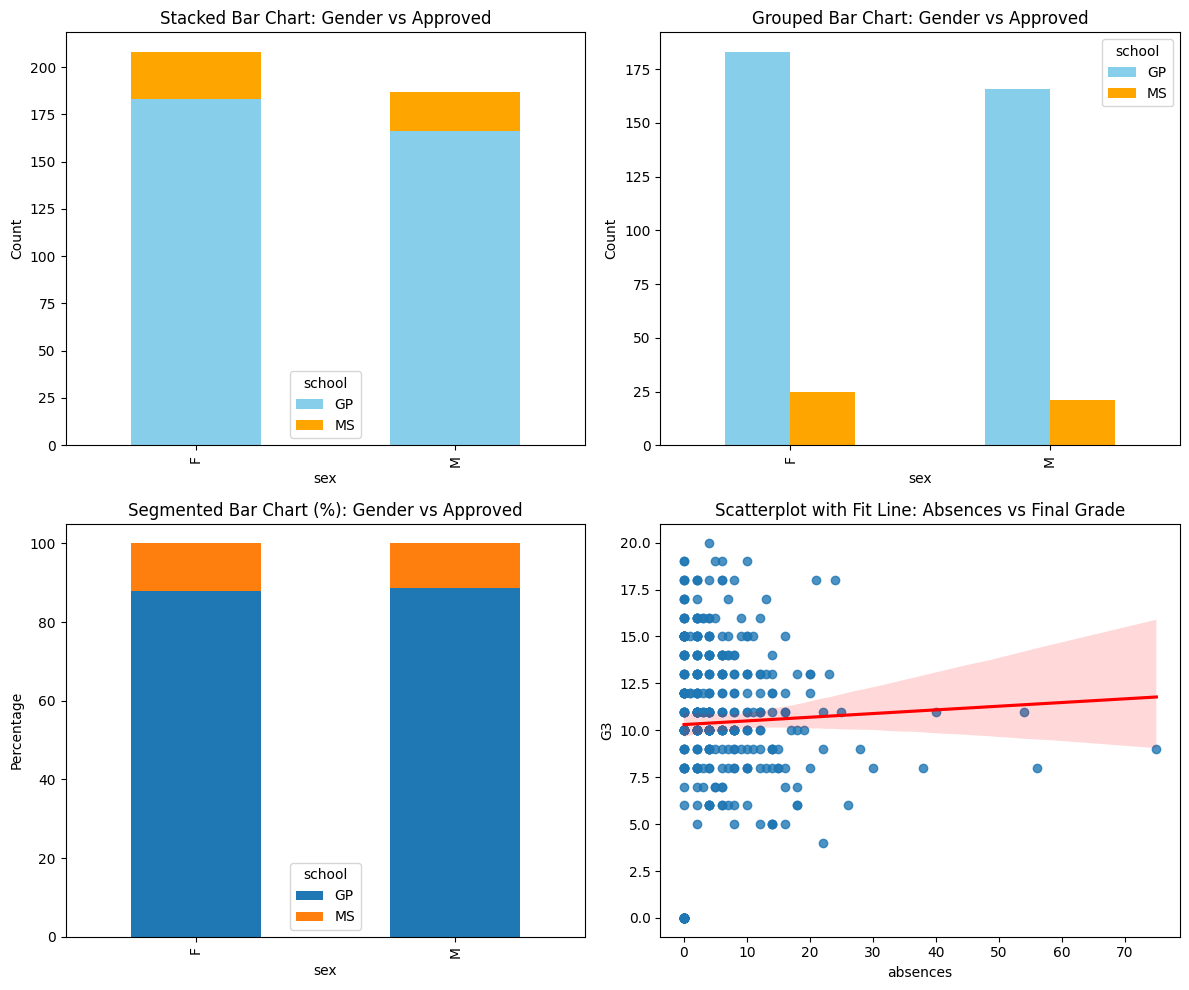

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

pd.crosstab(df['sex'], df['school']).plot(kind='bar', stacked=True, color=['skyblue','orange'], ax=axes[0,0])
axes[0,0].set_title("Stacked Bar Chart: Gender vs Approved")
axes[0,0].set_ylabel("Count")

pd.crosstab(df['sex'], df['school']).plot(kind='bar',stacked=False, color=['skyblue','orange'], ax=axes[0,1])
axes[0,1].set_title("Grouped Bar Chart: Gender vs Approved")
axes[0,1].set_ylabel("Count")

(pd.crosstab(df['sex'], df['school'], normalize='index') * 100).plot(kind='bar',stacked=True, ax=axes[1,0])
axes[1,0].set_title("Segmented Bar Chart (%): Gender vs Approved")
axes[1,0].set_ylabel("Percentage")

sns.regplot(data=df, x='absences', y='G3', ax=axes[1,1], line_kws={'color':'red'})
axes[1,1].set_title("Scatterplot with Fit Line: Absences vs Final Grade")

plt.tight_layout()
plt.show()

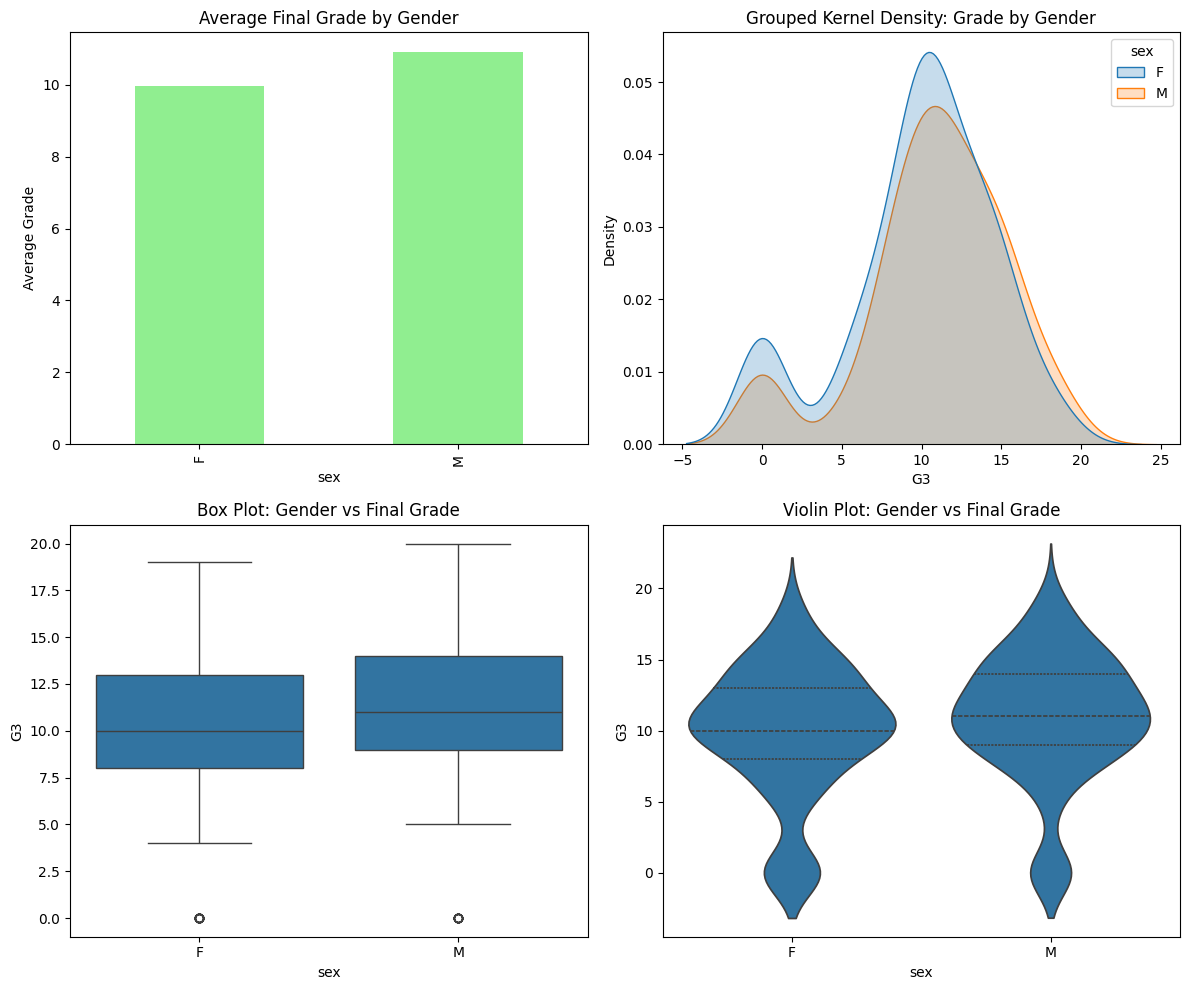

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

df.groupby('sex')['G3'].mean().plot(kind='bar', color='lightgreen', ax=axes[0, 0])
axes[0, 0].set_title("Average Final Grade by Gender")
axes[0, 0].set_ylabel("Average Grade")

sns.kdeplot(data=df, x='G3', hue='sex', fill=True, ax=axes[0, 1])
axes[0, 1].set_title("Grouped Kernel Density: Grade by Gender")

sns.boxplot(data=df, x='sex', y='G3', ax=axes[1, 0])
axes[1, 0].set_title("Box Plot: Gender vs Final Grade")

sns.violinplot(data=df, x='sex', y='G3', inner='quartile', ax=axes[1, 1])
axes[1, 1].set_title("Violin Plot: Gender vs Final Grade")

plt.tight_layout()
plt.show()

In [ ]:
!pip install joypy

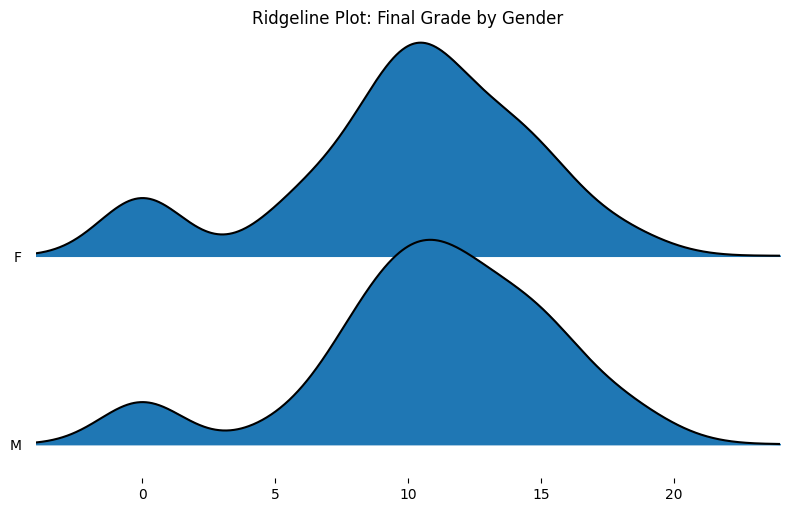

In [ ]:
from joypy import joyplot
joyplot(df, by='sex', column='G3', figsize=(8,5))
plt.title("Ridgeline Plot: Final Grade by Gender")
plt.show()

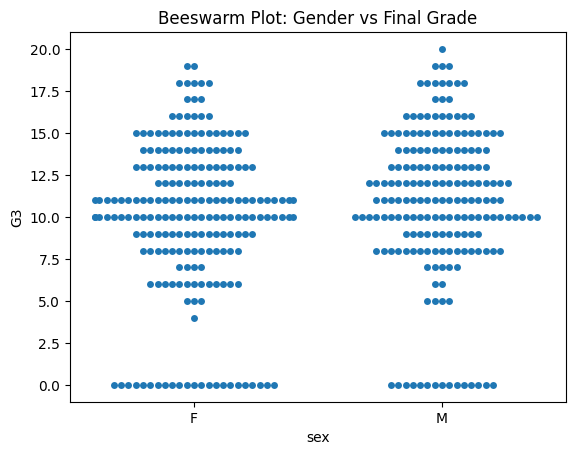

In [ ]:
sns.swarmplot(data=df, x='sex', y='G3')
plt.title("Beeswarm Plot: Gender vs Final Grade")
plt.show()